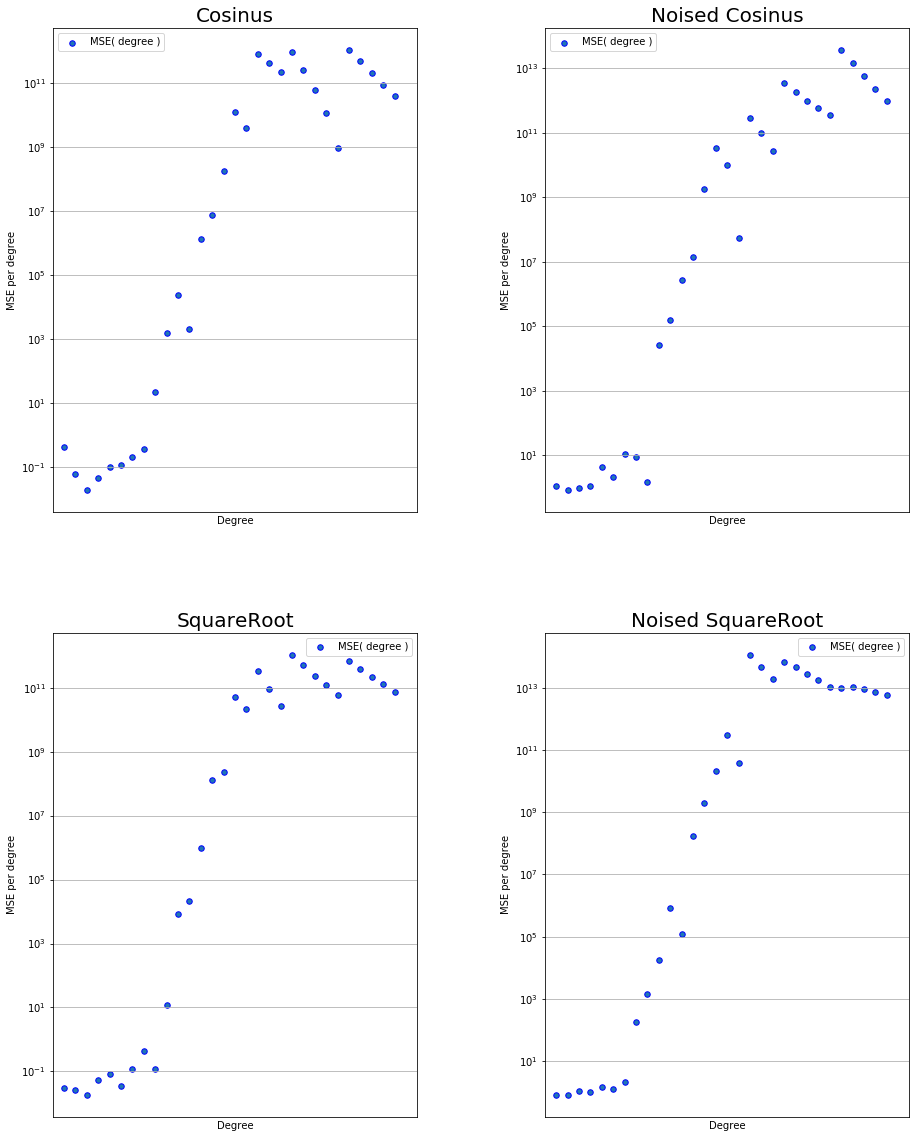

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(0)

n_samples = 30

def true_cos(X):
    return np.cos(1.5 * np.pi * X)

def true_sqrt(X):
    return np.sqrt(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))

y_cos = true_cos(X) + np.random.randn(n_samples) * 0.1
y_noised_cos = true_cos(X) + np.random.randn(n_samples) * 1

y_sqrt = true_sqrt(X) + np.random.randn(n_samples) * 0.1
y_noised_sqrt = true_sqrt(X) + np.random.randn(n_samples) * 1

degrees = [i+1 for i in range(30)]
number_of_models = [i for i in range(4)]
model_names = ['Cosinus', 'Noised Cosinus', 'SquareRoot', 'Noised SquareRoot']
subplots = [ 221, 222, 223, 224 ]

plt.figure( figsize=( 14, 18 ))

for i in range( len( number_of_models )):
    
    ax =  plt.subplot(subplots[i])#plt.subplot( 1, len(number_of_models), i+1 )
    plt.setp( ax, xticks=(), yticks=() )
    plt.yscale( 'log' )
   
    
    scores_per_degree = []
    
    for j in range( len(degrees) ):
        
        polynomial_features = PolynomialFeatures(degree=degrees[j],
                                                 include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        if i == 0:
            
            pipeline.fit(X[:, np.newaxis], y_cos )
            scores = cross_val_score(pipeline, X[:, np.newaxis], y_cos,
                                     scoring="neg_mean_squared_error", cv=10)
            scores_per_degree.append( -scores.mean() )
       
        elif i == 1:
            
            pipeline.fit(X[:, np.newaxis], y_noised_cos )
            scores = cross_val_score(pipeline, X[:, np.newaxis], y_noised_cos,
                                     scoring="neg_mean_squared_error", cv=10)
            scores_per_degree.append( -scores.mean() )
        
        elif i == 2:
            
            pipeline.fit(X[:, np.newaxis], y_sqrt )
            scores = cross_val_score(pipeline, X[:, np.newaxis], y_sqrt,
                                     scoring="neg_mean_squared_error", cv=10)
            scores_per_degree.append( -scores.mean() )
       
        elif i == 3:
            
            pipeline.fit(X[:, np.newaxis], y_noised_sqrt )
            scores = cross_val_score(pipeline, X[:, np.newaxis], y_noised_sqrt,
                                     scoring="neg_mean_squared_error", cv=10)
            scores_per_degree.append( -scores.mean() )
    
    plt.scatter( degrees, scores_per_degree, edgecolor = 'b', s = len( degrees ), label = "MSE( degree )")
    plt.xlabel( "Degree" )
    plt.ylabel( "MSE per degree" )
    plt.grid( True )
    plt.xlim(( 0, 32 ))
    plt.legend( loc="best" )
    plt.title( "{}".format( model_names[i] ), fontsize=20 )

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()
